## Gender Inequality to Equality Indiex Conversion Model

- Purpose: The model aims to predict equality scores for the years 2004 to 2021 for various countries based on historical data. <br><br>
- Type of Model: Linear Regression <br><br>
- Data Input: <br>
  The model uses two datasets:
  - df1: Historical gender equality scores of countries from 1950 to 2003.
  - df2: Historical gender Inequality scores of countries from 1990 to 2021. <br><br>
- Data Preprocessing: <br>
  - Merging: Data from df1 and df2 are merged based on common countries and years.
  - Cleaning: Rows with missing data (NaN values) in either df1 or df2 are removed. <br><br>
- Model Fitting: For each country, the model is trained using df2 data as the independent variable and df1 data as the dependent variable. <br><br>
- Prediction: The model predicts df1 scores for each country from 2004 to 2021, using the corresponding df2 data. <br><br>
- Validation: The model's performance is validated using the Mean Squared Error (MSE) metric, which quantifies the difference between the predicted and actual df1 scores for the available data up to 2003. <br><br>
- Visualization: The MSE for each country's predictions is visualized in a bar chart, facilitating a comparative analysis of the model's accuracy across different countries. <br><br>
- Limitation: The model's accuracy is contingent on the quality and quantity of available historical data. Missing data or inconsistencies in data collection can affect prediction accuracy. 

#### Equality Index - data preprocessing 

In [31]:
import pandas as pd
import numpy as np

file_name = 'Equality_Indices_1950_2003.xlsx'
sheet_name = 'Data Long Format'

data = pd.read_excel(file_name, sheet_name=sheet_name)

# Make sure NaNs are recognized as such 
data.replace('NaN', np.nan, inplace=True)  

# Pivot the table
pivoted_data = data.pivot(index='year', columns='country.name', values='value')

# Rename 'country.name' to 'country'
pivoted_data.columns.name = 'country'

# Remove columns with any NaN values
df1 = pivoted_data.dropna(axis=1, how='any')

print(df1.head())

country  Afghanistan   Albania   Algeria  Argentina  Australia   Austria  \
year                                                                       
1950        48.08965  62.16758  58.69954   62.90646   64.61433  65.83807   
1951        55.24005  65.20097  54.34438   70.21036   63.45541  64.61826   
1952        61.74992  65.30030  53.70153   67.25394   63.14905  63.25948   
1953        56.22922  63.97491  57.16289   70.47183   65.52167  64.31749   
1954        53.39708  63.61815  62.10764   67.38260   65.51696  65.99413   

country   Bahrain  Bangladesh   Belgium     Benin  ...    Uganda  \
year                                               ...             
1950     51.66615    47.47802  65.15080  59.90610  ...  55.56835   
1951     57.68635    48.85684  65.87632  60.42660  ...  59.27914   
1952     60.39762    53.96572  65.84652  60.95809  ...  60.32481   
1953     56.67785    55.78814  65.96997  64.56538  ...  66.46885   
1954     56.23914    53.92033  64.20976  60.54518  ...  57.

### Inequality Index - data preprocessing 

In [32]:
file_path = 'Inequality_Indices_1990_2020.csv'

# Define the columns of interest
columns_of_interest = [
    'country',
    'gii_1990', 'gii_1991', 'gii_1992', 'gii_1993', 'gii_1994', 'gii_1995',
    'gii_1996', 'gii_1997', 'gii_1998', 'gii_1999', 'gii_2000', 'gii_2001', 'gii_2002',
    'gii_2003', 'gii_2004', 'gii_2005', 'gii_2006', 'gii_2007', 'gii_2008', 'gii_2009',
    'gii_2010', 'gii_2011', 'gii_2012', 'gii_2013', 'gii_2014', 'gii_2015', 'gii_2016',
    'gii_2017', 'gii_2018', 'gii_2019', 'gii_2020', 'gii_2021'
]


# Load the data
try:
    df = pd.read_csv(file_path, sep=';', usecols=columns_of_interest)
except Exception as e:
    print(f"An error occurred: {e}")

# Rename columns to strip the 'gii_' prefix and convert to years
df = df.rename(columns=lambda x: x.replace('gii_', ''))

# Transpose the DataFrame
df_transposed = df.set_index('country').T

# Convert all data to float64
df2 = df_transposed.astype('float64')

# Print the modified DataFrame
print(df2.head())


country  Afghanistan  Angola  Albania  Andorra  United Arab Emirates  \
1990             NaN   725.0      NaN      NaN                659.00   
1991             NaN   723.0      NaN      NaN                647.00   
1992             NaN   721.0      NaN      NaN                  0.64   
1993             NaN   719.0      NaN      NaN                632.00   
1994             NaN   717.0      NaN      NaN                635.00   

country  Argentina  Armenia  Antigua and Barbuda  Australia  Austria  ...  \
1990        442.00     0.47                  NaN      185.0   202.00  ...   
1991        439.00   468.00                  NaN      184.0   204.00  ...   
1992        436.00   487.00                  NaN      184.0   201.00  ...   
1993          0.43   491.00                  NaN      181.0   195.00  ...   
1994        429.00   481.00                  NaN      179.0     0.18  ...   

country  High human development  Medium human development  \
1990                        NaN            

### Extract overlapping years and countries

In [56]:
# Ensure the country names are consistent across both dataframes
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Find overlapping countries
common_countries = set(df1.columns) & set(df2.columns)

# Find overlapping years
# Convert year indices to the same type
if df1.index.dtype != df2.index.dtype:
    df1.index = df1.index.map(str)
    df2.index = df2.index.map(str)

# Find common years
common_years = set(df1.index) & set(df2.index)

# Convert sets to lists to avoid future warnings
common_countries_list = list(common_countries)
common_years_list = list(common_years)

print("Number of common years:", len(common_years_list))
print("Number of common countries:", len(common_countries), ":", common_countries)

# Filter df1 for common years and countries
df1_filtered = df1[common_countries_list].loc[common_years_list]

# Filter df2 for common years and countries
df2_filtered = df2[common_countries_list].loc[common_years_list]

# Merge the DataFrames
# Using an inner join to ensure only common years and countries are included
merged_df = pd.merge(df1_filtered, df2_filtered, left_index=True, right_index=True, how='inner', suffixes=('_df1', '_df2'))

# Reset the index to turn the year index into a regular column
merged_df_reset = merged_df.reset_index()

# Rename the index column to 'year' 
merged_df_reset.rename(columns={'index': 'year'}, inplace=True)

# Check the merged DataFrame
print(merged_df_reset.head())

# save this DataFrame to a CSV file
merged_df_reset.to_csv('merged_data_with_year.csv', index=False)



Number of common years: 14
Number of common countries: 101 : {'Pakistan', 'Nepal', 'South Africa', 'Poland', 'Mali', 'Togo', 'Singapore', 'Botswana', 'Japan', 'Greece', 'El Salvador', 'Turkey', 'United Kingdom', 'Mozambique', 'Austria', 'Niger', 'Uruguay', 'Senegal', 'France', 'Malaysia', 'Bahrain', 'Cameroon', 'Italy', 'China', 'Myanmar', 'Cuba', 'New Zealand', 'Haiti', 'Paraguay', 'Canada', 'Kuwait', 'Uganda', 'Egypt', 'Congo', 'Israel', 'Spain', 'Honduras', 'Portugal', 'Norway', 'Libya', 'Benin', 'Morocco', 'Brazil', 'Mauritania', 'Nicaragua', 'Switzerland', 'Peru', 'Burundi', 'Dominican Republic', 'Colombia', 'Argentina', 'Hungary', 'Guatemala', 'Jordan', 'Central African Republic', 'Iraq', 'Netherlands', 'Mexico', 'Sierra Leone', 'Ecuador', 'Yemen', 'Zimbabwe', 'India', 'Bulgaria', 'Sri Lanka', 'Qatar', 'Tunisia', 'Philippines', 'Afghanistan', 'Jamaica', 'Chile', 'United States', 'Liberia', 'Trinidad and Tobago', 'Bangladesh', 'Denmark', 'Ireland', 'Rwanda', 'Costa Rica', 'Germany

### Dataset Year List

In [34]:
df1.index = df1.index.map(str)
df2.index = df2.index.map(str)

print(df1.index)
print(df2.index)

common_years = df1.index.intersection(df2.index)
print(common_years)


Index(['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958',
       '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003'],
      dtype='object', name='year')
Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021'],
      dtype='object')
Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003'],
      dtype='object')


### Prepare prediction output dataframe

In [51]:
# First, convert the year index to string 
df2.index = df2.index.map(str)

# Filter df2 for the years 2004 to 2021
df2_2004_2021 = df2.loc['2004':'2021']

# Filter to include only the countries in common_countries_list
df2_2004_2021 = df2_2004_2021[common_countries_list]

# Check for missing values and print them out
for country in common_countries_list:
    missing_years = df2_2004_2021[country].isna()
    if missing_years.any():
        missing_years_list = missing_years[missing_years].index.tolist()
        print(f"Missing data for {country} in years: {missing_years_list}")

# Display the first few rows of the filtered DataFrame
print(df2_2004_2021.head())



Missing data for Myanmar in years: ['2004', '2005', '2006', '2007', '2008', '2009']
Missing data for Libya in years: ['2004']
Missing data for Qatar in years: ['2004', '2005']
Missing data for Afghanistan in years: ['2004']
country  Pakistan  Nepal  South Africa  Poland   Mali    Togo  Singapore  \
2004        642.0  651.0         459.0   153.0  667.0    0.65      155.0   
2005        633.0  643.0         454.0   157.0  665.0    0.64      151.0   
2006        614.0  633.0         456.0   159.0  642.0    0.63      129.0   
2007        611.0  576.0         452.0   166.0  647.0  617.00      111.0   
2008        602.0  532.0         463.0   173.0  652.0  615.00       99.0   

country  Botswana  Japan  Greece  ...  Zambia  Thailand  Indonesia  Mongolia  \
2004        528.0  155.0  176.00  ...   623.0     407.0     547.00     401.0   
2005        521.0  142.0  178.00  ...   617.0     394.0     544.00     392.0   
2006        513.0  138.0  176.00  ...   606.0     409.0     542.00       0.4   

### Regression Model and MSE 

       Pakistan      Nepal  South Africa     Poland       Mali       Togo  \
2004  54.247920  60.453738     80.929995  76.321966  56.237789  63.437368   
2005  54.287612  60.442374     82.467020  76.210419  56.244536  63.437420   
2006  54.371406  60.428169     81.852210  76.154645  56.322130  63.437473   
2007  54.384637  60.347200     83.081830  75.959437  56.305261  60.197794   
2008  54.424328  60.284698     79.700375  75.764229  56.288393  60.208306   

      Singapore   Botswana      Japan     Greece  ...     Zambia   Thailand  \
2004  67.376957  74.108017  69.072554  66.577076  ...  62.782619  70.398510   
2005  67.363137  74.500287  69.091934  66.572983  ...  62.760522  70.543655   
2006  67.287124  74.948595  69.097897  66.577076  ...  62.720010  70.376180   
2007  67.224933  75.228788  69.111314  66.936888  ...  60.490382  70.532490   
2008  67.183471  75.396904  69.112805  66.583215  ...  62.675815  70.621810   

      Indonesia   Mongolia    Belgium  Saudi Arabia   Cambodia

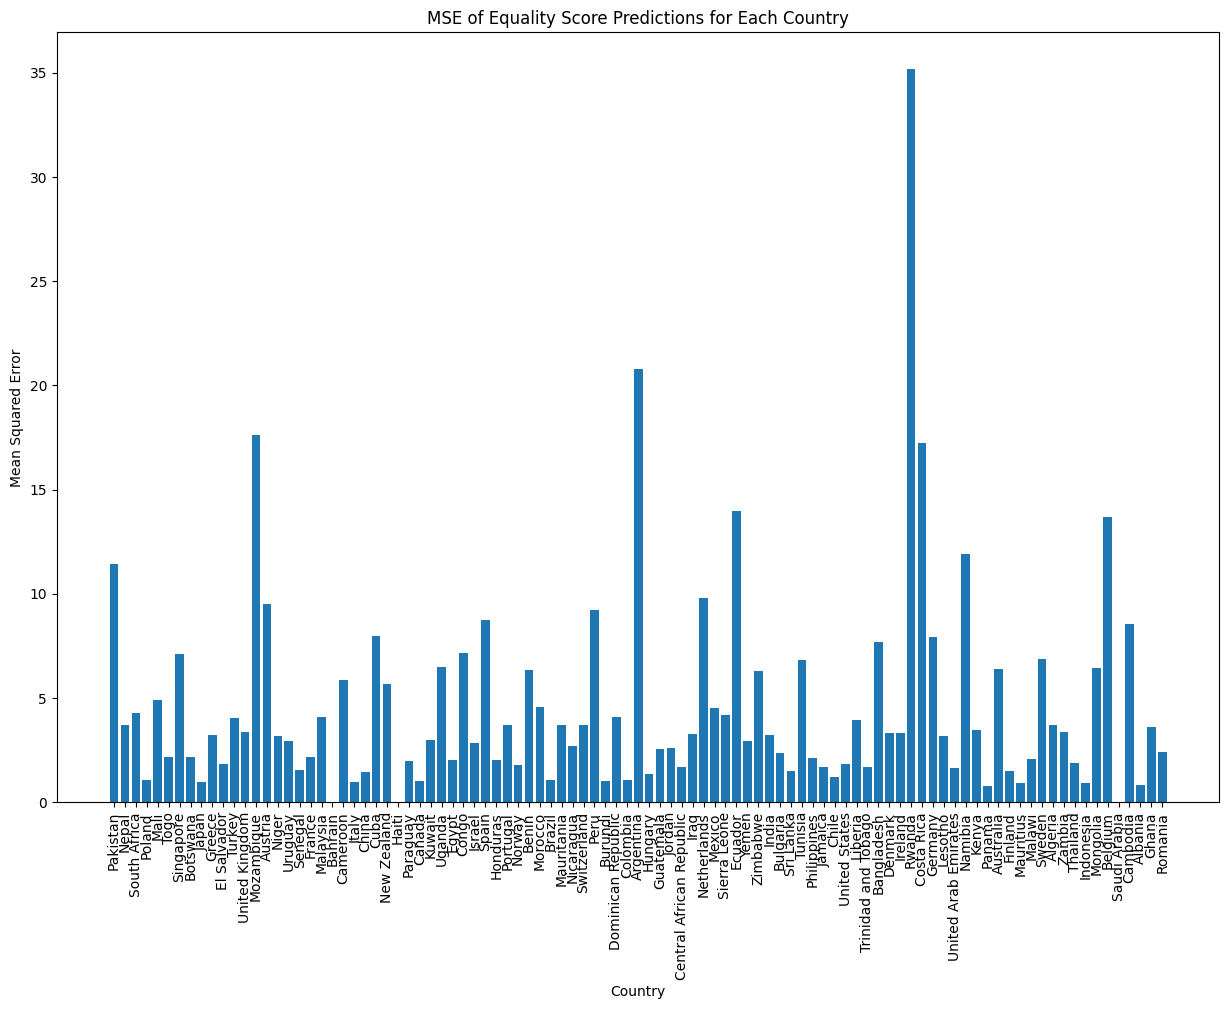

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Dictionary to hold predictions and MSE for each country
predictions_dict = {}
mse_dict = {}

# Loop through each country in the common countries list
for country in common_countries_list:
    if f'{country}_df1' in merged_df.columns:
        # Extract df1 and df2 data for the country
        country_df1 = merged_df[f'{country}_df1']
        country_df2 = merged_df[f'{country}_df2']

        # Drop countries where either df1 or df2 data is NaN
        valid_data = merged_df.dropna(subset=[f'{country}_df1', f'{country}_df2'])

        # Prepare X and y for model fitting
        X = valid_data[f'{country}_df2'].values.reshape(-1, 1)
        y = valid_data[f'{country}_df1'].values

        # Fit the linear regression model if enough data points are available
        if len(X) > 0 and len(y) > 0:
            model = LinearRegression()
            model.fit(X, y)

            # Calculate predictions and MSE
            y_pred = model.predict(X)
            mse = mean_squared_error(y, y_pred)
            mse_dict[country] = mse

            # Store predictions 
            if f'{country}' in df2_2004_2021.columns:
                future_X = df2_2004_2021[f'{country}'].dropna().values.reshape(-1, 1)
                future_predictions = model.predict(future_X)
                predictions_dict[country] = future_predictions


# Convert predictions_dict to a DataFrame
predicted_df1_2004_2021 = pd.DataFrame(predictions_dict, index=range(2004, 2022))

# Output the result
print(predicted_df1_2004_2021.head())

# Write to a CSV file
predicted_df1_2004_2021.to_csv('predicted_df1_2004_2021.csv', index=True, index_label='year')

# Plot the MSE for all countries
plt.figure(figsize=(15, 10))
plt.bar(range(len(mse_dict)), list(mse_dict.values()), align='center')
plt.xticks(range(len(mse_dict)), list(mse_dict.keys()), rotation='vertical')
plt.xlabel('Country')
plt.ylabel('Mean Squared Error')
plt.title('MSE of Equality Score Predictions for Each Country')
plt.show()
